Sự khác biệt trong khác biệt (DiD) là một phương pháp thống kê thường được sử dụng trong đánh giá tác động để ước tính tác động nhân quả của một phương pháp điều trị hoặc sự thay đổi của chính sách nào đó. Phương pháp này rất hữu hiệu khi bạn có dữ liệu quan sát và muốn so sánh kết quả của một nhóm được can thiệp hay bị ảnh hưởng từ chính sách (the "treatment group") với kết quả của một nhóm không can thiệp (the "control group") trước và sau khi việc can thiệp được thực hiện. Dưới đây là các bước chính để tiến hành đánh giá tác động bằng DiD:

1. Xác định nhóm bị can thiệp và nhóm đối chứng (Treatment and Control Groups):
    - Xác định nhóm bị can thiệp hoặc thay đổi chính sách.
    - Lựa chọn nhóm đối chứng `tương tự` như nhóm can thiệp nhưng chưa bị tác động của chính sách. Nhóm này lý tưởng nhất phải có những đặc điểm và xu hướng tương tự theo thời gian.

2. Thu thập dữ liệu:
    - Thu thập dữ liệu về biến kết quả được quan tâm của cả nhóm can thiệp và nhóm đối chứng trong nhiều khoảng thời gian, trước và sau can thiệp. Bạn cần ít nhất hai thời điểm trước và hai thời điểm sau can thiệp.

3. Giả định về xu hướng song song:
    - Một giả định quan trọng trong phân tích DiD là nếu không có biện pháp can thiệp, nhóm can thiệp và đối chứng sẽ có xu hướng song song theo thời gian. Nói cách khác, kết quả của họ sẽ tiến triển tương tự nếu việc can thiệp không xảy ra.

4. Ước tính mô hình DiD:
    - Chạy mô hình hồi quy bao gồm các biến chỉ số cho cả nhóm can thiệp và các khoảng thời gian sau can thiệp. Công cụ ước tính DiD là hệ số về sự tương tác giữa các biến chỉ báo này.

    Mô hình DiD:

    $$Y_{it} = β_0 + β_1 * Treatment_i + β_2 * Post_t + β_3 * (Treatment_i * Post_t) + ε_{it}$$

    - $Y_{it}$ là biến kết quả của cá nhân i tại thời điểm t.
    - $Treatment_i$ là chỉ báo `nhị phân` cho biết cá nhân i thuộc nhóm can thiệp (1) hay nhóm đối chứng (0).
    - $Post_t$ là chỉ báo `nhị phân` cho biết khoảng thời gian là sau can thiệp (1) hay trước (0).
    - $β_3$ là ước lượng DiD, biểu thị hiệu quả can thiệp.

5. Giải thích kết quả:
    - Hệ số $β_3$ thể hiện hiệu quả can thiệp ước tính. Giá trị dương cho biết chính sách có tác động tích cực đến kết quả, giá trị âm cho biết tác động tiêu cực.

6. Kiểm tra ổn định:
    - Tiến hành phân tích độ nhạy để đánh giá độ tin cậy của kết quả. Điều này có thể bao gồm việc thử nghiệm các tiêu chí đánh giá khác nhau của nhóm kiểm soát, khoảng thời gian hoặc hệ số của mô hình.

7. Giải quyết các vấn đề tiềm ẩn:
    - Giải quyết mọi vấn đề tiềm ẩn như sai lệch lựa chọn, lỗi đo lường hoặc tính nội sinh có thể ảnh hưởng đến tính hợp lệ của kết quả của bạn.


![](https://www.emerald.com/insight/proxy/img?link=resource/id/urn:emeraldgroup.com:asset:id:article:10_1108_RAUSP-05-2019-0112/urn:emeraldgroup.com:asset:id:binary:RAUSP-05-2019-011206.tif)

Từ công thức hồi quy DiD:

$$Y_{it} = β_0 + β_1 * Treatment_i + β_2 * Post_t + β_3 * (Treatment_i * Post_t) + ε_{it}$$

Ta có thể tách riêng công thức cho nhóm treatment và nhóm control như sau:

1. Cho nhóm treatment (Treatment = 1):


$$Y_{it}^{Treatment} = (β_0 + β_1) + (β_2 + β_3) * Post_t + ε_{it}^{Treatment}$$

2. Cho nhóm control (Treatment = 0):


$$Y_{it}^{Control} = β_0 + β_2 * Post_t + ε_{it}^{Control}$$

Trong đó:

- $Y_{it}^{Treatment}$ là biến phản ứng (ví dụ: chi tiêu trung bình hàng tháng) cho nhóm treatment tại thời điểm $t$.
- $Y_{it}^{Control}$ là biến phản ứng cho nhóm control tại thời điểm $t$.
- $β_0$ là hệ số chặn (intercept) chung cho cả hai nhóm.
- $β_1$ là hệ số ước lượng cho biến Treatment (nhóm treatment vs. nhóm control).
- $β_2$ là hệ số ước lượng cho biến Post (thời gian sau can thiệp vs. trước can thiệp).
- $β_3$ là hệ số ước lượng cho biến tương tác (Treatment và Post).
- $ε_{it}^{Treatment}$ và $ε_{it}^{Control}$ là thành phần sai số (error term) tương ứng cho từng nhóm.

Công thức này cho phép bạn tính ước lượng cho từng nhóm riêng biệt và thấy cách can thiệp (Treatment) ảnh hưởng đến biến phản ứng (Y) trong từng nhóm.

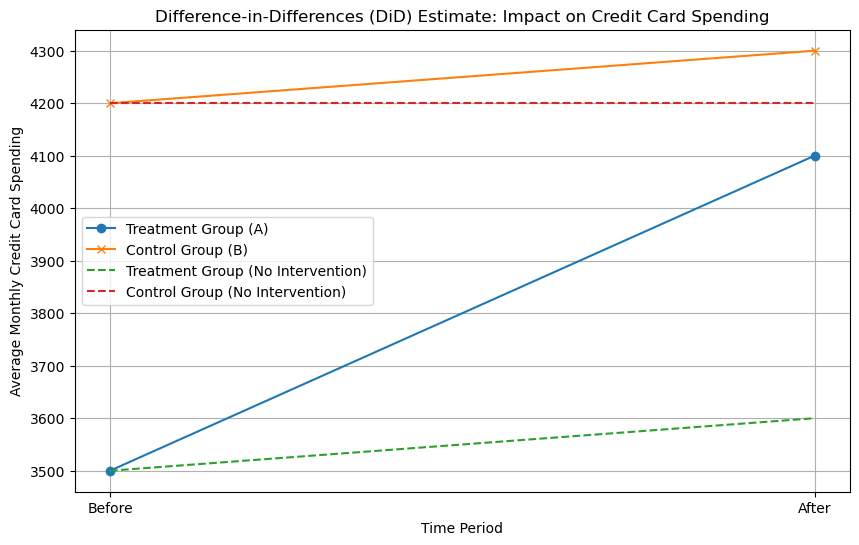

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)

# Create a DataFrame with pre- and post-reform data for treatment and control groups
data = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B'],
    'Period': ['Before', 'After', 'Before', 'After'],
    'Credit_Limit': [5000, 5300, 5200, 5100],  # Simulated credit limit data
    'Spending': [3500, 4100, 4200, 4300],  # Simulated credit card spending
})

# Calculate the DiD estimate using the parallel trends assumption
control_group_before_mean = data[(data['Group'] == 'B') & (data['Period'] == 'Before')]['Spending'].mean()
control_group_after_mean = data[(data['Group'] == 'B') & (data['Period'] == 'After')]['Spending'].mean()

treatment_group_before_mean = data[(data['Group'] == 'A') & (data['Period'] == 'Before')]['Spending'].mean()

counterfactual_treatment_group_after = treatment_group_before_mean + (control_group_after_mean - control_group_before_mean)
counterfactual_control_group_after = control_group_before_mean  # Counterfactual for control group

# Visualize the results with line graphs
plt.figure(figsize=(10, 6))
plt.title('Difference-in-Differences (DiD) Estimate: Impact on Credit Card Spending')
plt.xlabel('Time Period')
plt.ylabel('Average Monthly Credit Card Spending')
plt.grid(True)

# Plot spending for the treatment group before and after the intervention
treatment_group = data[data['Group'] == 'A']
plt.plot(treatment_group['Period'], treatment_group['Spending'], marker='o', label='Treatment Group (A)')

# Plot spending for the control group before and after the intervention
control_group = data[data['Group'] == 'B']
plt.plot(control_group['Period'], control_group['Spending'], marker='x', label='Control Group (B)')

# Plot spending for the treatment group assuming no intervention (counterfactual for treatment group)
plt.plot(treatment_group['Period'], [treatment_group_before_mean, counterfactual_treatment_group_after],
         linestyle='--', label='Treatment Group (No Intervention)')

# Plot spending for the control group assuming no intervention (counterfactual for control group)
plt.plot(control_group['Period'], [control_group_before_mean, counterfactual_control_group_after],
         linestyle='--', label='Control Group (No Intervention)')

plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)

# Create a DataFrame with pre- and post-intervention data for treatment and control groups
years = list(range(2010, 2021))
treatment_status = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 0 for control, 1 for treatment
credit_limit = [5000, 5000, 5000, 5000, 5000, 10000, 10000, 10000, 10000, 10000, 10000]
spending = [3500, 4000, 4200, 4800, 5500, 8000, 8500, 9000, 9200, 9500, 9800]

data = pd.DataFrame({
    'Year': years,
    'Treatment': treatment_status,
    'Credit_Limit': credit_limit,
    'Spending': spending,
})

# Create an indicator variable for the post-intervention period
data['Post'] = (data['Year'] >= 2015).astype(int)

# Create the interaction term 'Treatment*Post'
data['Treatment*Post'] = data['Treatment'] * data['Post']

# Run a DiD regression
X = data[['Treatment', 'Post', 'Treatment*Post', 'Credit_Limit']]
X = sm.add_constant(X)  # Add a constant term
y = data['Spending']

In [7]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           2.08e-06
Time:                        10:09:13   Log-Likelihood:                -86.750
No. Observations:                  11   AIC:                             177.5
Df Residuals:                       9   BIC:                             178.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -49.9999    174.960     -0.

c:\Users\binhnn2\anaconda3\envs\rdm\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Tác động của các hệ số:

- $β_1$ đo lường tác động của can thiệp (Treatment) lên biến phản ứng ($Y_{it}$) cho nhóm treatment so với nhóm control trước can thiệp. Nếu $β_1$ có ý nghĩa thống kê, điều này ngụ ý rằng nếu không có bất kỳ can thiệp gì thì nhóm treatment đã khác nhóm control một lượng là $β_1$.

- $β_2$ đo lường tác động của thời gian (Post) lên biến phản ứng ($Y_{it}$) cho nhóm control. Nếu $β_2$ dương và có ý nghĩa thống kê, nếu không có bất kỳ hành động can thiệp nào thì khoảng thời gian sau năm 2015 vẫn chi tiêu cao hơn trước.

- $β_3$ đo lường hiệu ứng can thiệp (DiD) trên biến phản ứng ($Y_{it}$). Nếu $β_3$ dương và có ý nghĩa thống kê, điều này ngụ ý rằng can thiệp đã tạo ra sự thay đổi khác biệt giữa nhóm treatment và nhóm control sau can thiệp. Điều này là ước lượng chính của bạn trong mô hình DiD.

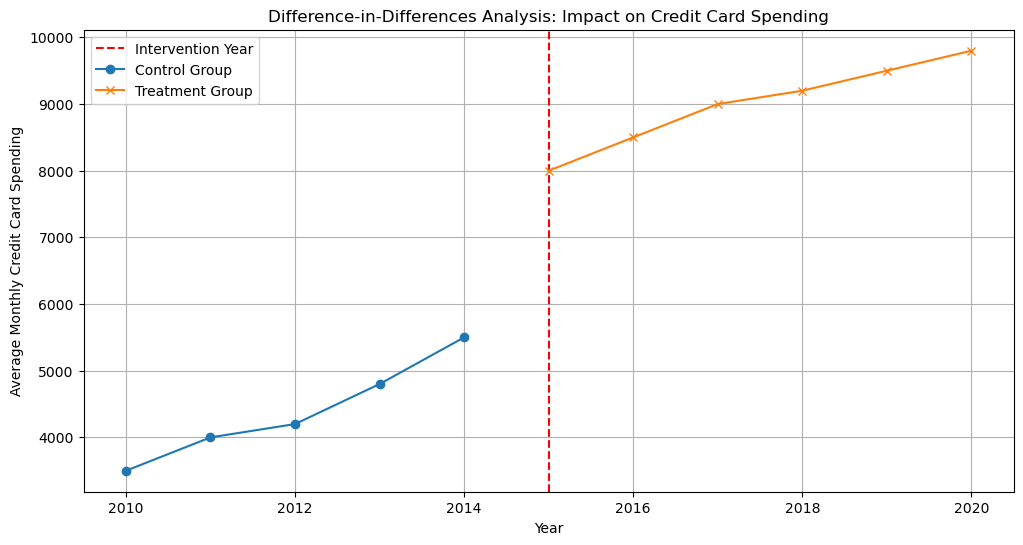

In [9]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.title('Difference-in-Differences Analysis: Impact on Credit Card Spending')
plt.axvline(x=2015, color='red', linestyle='--', label='Intervention Year')

# Plot the control group
control_group = data[data['Treatment'] == 0]
plt.plot(control_group['Year'], control_group['Spending'], marker='o', label='Control Group')

# Plot the treatment group
treatment_group = data[data['Treatment'] == 1]
plt.plot(treatment_group['Year'], treatment_group['Spending'], marker='x', label='Treatment Group')

plt.xlabel('Year')
plt.ylabel('Average Monthly Credit Card Spending')
plt.legend()
plt.grid(True)

plt.show()